# Chapter 4. 신경망 학습

## 4.1 데이터에서 학습한다!

### 4.1.1 데이터 주도 학습

> 데이터

### 4.1.2 훈련 데이터와 시험 데이터

- 기계 학습 문제는 데이터를 **훈련 데이터**와 **시험 데이터**로 나눠 **학습**과 **실험**을 수행하는 것이 일반적입니다.
- 훈련 데이터와 시험 데이터를 나누는 이유는?
  - 우리가 원하는 것은 **범용적으로** 사용할 수 있는 모델, 즉 **일반화**가 잘된 모델이기 때문입니다. 이것을 제대로 평가하기 위해 **훈련 데이터**와 **시험 데이터**를 분리하는 것입니다.

> 과적합, 과대적합, 오버피팅

## 4.2 손실 함수, 비용 함수

### 4.2.1 오차제곱합 (Sum of Squares for Error, SSE)

$$ E = \frac{1}{2} \sum_{k}(y_k - t_k)^2 $$

- $y_k$는 신경망의 출력(신경망이 추정한 값)
- $t_k$는 정답 레이블
- $k$는 데이터의 차원 수

In [1]:
import numpy as np


def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [2]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: '2'일 확률이 가장 높다고 추정함 (0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.5, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))

# 예2: '7'일 확률이 가장 높다고 추정함 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.5, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y2), np.array(t)))

0.22125000000000003
0.72125


### 4.2.2 교차 엔트로피 오차 (Cross Entropy Error, CEE)

> 교차 엔트로피 오차 수식
$$ E = - \sum_k t_k\log y_k $$

- $\log$는 밑이 $e$인 자연로그($\log_e$)
- $y_k$는 신경망의 출력(신경망이 추정한 값)
- $t_k$는 정답 레이블
  - 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0 (원-핫 인코딩)
  - 실질적으로 정답일 때의 추정($t_k$가 1일때의 y)의 자연로그를 계산하는 식이 됩니다.
    - 정답이 아닌 나머지 모두는 $t_k$가 0이므로 $\log y_k$와 곱해도 0이 되어 결과에 영향을 주지 않습니다.
- 예) 정답 레이블이 '2'일 때의 신경망 출력이 0.6이라면, $-\log 0.6=0.51$

> 교차 엔트로피 오차 계산 예시

- 다중 클래스 분류 문제에서 교차 엔트로피 계산 예시:

  - 클래스: 3개 (A, B, C)
  - 실제 레이블: B (즉, 원-핫 인코딩으로 [0, 1, 0])
  - 모델 예측: [0.2, 0.7, 0.1] (클래스 A, B, C에 대한 확률)

- 교차 엔트로피 손실은 다음과 같이 계산됩니다:

$$ H(p, q) = -\sum_{i=1}^{C} p_i \log(q_i) 
$$

- 여기서  p = [0, 1, 0]  (실제 레이블)이고,  q = [0.2, 0.7, 0.1]  (모델 예측 확률)입니다. 따라서 교차 엔트로피 손실은:

$$
H(p, q) = -[0 \cdot \log(0.2) + 1 \cdot \log(0.7) + 0 \cdot \log(0.1)] = -\log(0.7)
$$

- 이 계산은 모델이 예측한 확률 분포가 실제 레이블과 얼마나 일치하는지를 측정합니다.

##### ☑︎ 교차 엔트로피

> 교차 엔트로피 (다중 클래스 분류)

$$
H(p, q) = -\sum_{i=1}^{C} p_i \log(q_i)
$$

  - 여기서:
    - $C$는 클래스의 총 수
    - $p_i$는 실제 클래스의 확률 분포 (일반적으로 원-핫 인코딩에서 0 또는 1로 표현됨)
    - $q_i$는 모델의 예측 확률

> 교차 엔트로피 (이진 클래스 분류)
  
$$
H(p, q) = -\left[ p \log(q) + (1 - p) \log(1 - q) \right]
$$

- 여기서:
  - $p$는 실제 클래스 레이블(0 또는 1)
  - $q$는 모델의 예측 확률

##### ☑︎ 분류 - 교차 엔트로피에서의 확률 분포

> 실제 클래스 분류에서의 확률 분포는 일반적으로 원-핫 인코딩으로 표현됩니다.

- 원-핫 인코딩은 다음과 같은 형식을 갖습니다:
   - 각 클래스는 고유한 인덱스를 가지며,
   - 해당 클래스의 위치는 1로 표시되고, 나머지 클래스는 0으로 표시됩니다.
   - 예를 들어, 3개의 클래스가 있을 때, 실제 클래스가 두 번째 클래스(인덱스 1)라면, 원-핫 인코딩 표현은 다음과 같습니다:

    - $p = [0, 1, 0]$

    - 여기서  $p_i$ 는 실제 클래스 $i$ 에 대한 확률을 나타내며, 두 번째 클래스의 $p_i$는 1입니다. 나머지 클래스의 $p_i$는 0입니다.

- 확률 분포의 특성:
	- 총합이 1: 확률 분포의 모든 값의 합은 1입니다. 즉, $\sum_{i=1}^{C} p_i = 1$입니다.
	- 0 또는 1: 원-핫 인코딩에서는 한 클래스의 확률만 1이고, 나머지 클래스의 확률은 0입니다.
    
- 교차 엔트로피에서의 역할:
   - 교차 엔트로피 손실 함수는 예측된 확률 분포와 실제 확률 분포 간의 차이를 측정합니다. 
   - 실제 클래스의 확률 분포  $p_i$ 는 원-핫 인코딩을 사용하여 정확히 해당 클래스만을 1로 설정하고, 나머지 클래스는 0으로 설정하여, 실제 클래스에 대한 확률 정보를 제공합니다.

##### ☑︎ 원-핫 인코딩 외 실제 클래스 레이블을 표현할 수 있는 방법

1. 레이블 인코딩 (Label Encoding)

	- 정의: 각 클래스를 고유한 정수 값으로 인코딩합니다. 예를 들어, 클래스 A는 0, 클래스 B는 1, 클래스 C는 2와 같이 인코딩할 수 있습니다.
	- 장점: 간단하고 메모리 사용량이 적습니다.
	- 단점: 클래스 간의 순서나 거리 개념을 도입할 수 있어, 알고리즘에 따라 비정상적인 영향을 줄 수 있습니다. 예를 들어, 선형 모델에서는 클래스 간의 거리 개념이 있을 수 있으므로, 분류 성능이 저하될 수 있습니다.

2. 이진 행렬 인코딩 (Binary Matrix Encoding)

	- 정의: 각 클래스에 대해 이진 벡터를 사용하여 다중 클래스 문제를 해결합니다. 각 클래스에 대해 이진 벡터를 생성하고, 클래스가 속하는 벡터의 인덱스에 1을 설정합니다.
	- 장점: 다중 클래스 문제를 이진 분류 문제로 분해할 수 있습니다. 예를 들어, 클래스 A, B, C를 이진 인코딩으로 [1, 0, 0], [0, 1, 0], [0, 0, 1]로 표현할 수 있습니다.
	- 단점: 클래스 수가 많아질수록 인코딩 벡터의 차원이 커져 메모리 사용량이 증가합니다.

3. 라벨 스무딩 (Label Smoothing)

	- 정의: 원-핫 인코딩에서 직접적으로 1 또는 0을 사용하는 대신, 레이블 값을 부드럽게 합니다. 예를 들어, 원-핫 인코딩이 [0, 1, 0]이라면, 이를 [0.1, 0.8, 0.1]로 스무딩할 수 있습니다.
	- 장점: 모델이 과도하게 자신감 있는 예측을 방지하고, 일반화 성능을 향상시킬 수 있습니다. 특히, 데이터가 부족하거나 레이블의 불확실성이 있을 때 유용합니다.
	- 단점: 레이블의 정확성이 희생될 수 있으며, 스무딩 비율 설정이 필요합니다.

4. 임베딩 (Embedding)

	- 정의: 각 클래스를 고차원 벡터로 매핑합니다. 이 벡터는 보통 학습 과정에서 업데이트되며, 각 클래스에 대한 밀집 표현을 제공합니다.
	- 장점: 클래스 간의 복잡한 관계를 표현할 수 있으며, 특정 경우에는 데이터의 내재된 구조를 포착할 수 있습니다.
	- 단점: 벡터 차원 수를 정해야 하며, 학습 과정이 복잡해질 수 있습니다.

5. 확률 분포 (Probability Distribution)

	- 정의: 클래스 레이블을 직접적인 확률 분포로 표현합니다. 각 클래스가 선택될 확률을 직접 제공하며, 소프트맥스 함수로 모델의 출력을 확률 분포로 변환합니다.
	- 장점: 확률적 해석이 가능하며, 모델의 예측을 직접적으로 확률 분포와 비교할 수 있습니다.
	- 단점: 레이블의 확률 분포가 불확실하거나 모호할 수 있습니다.

6. 서포트 벡터 머신의 힌지 손실 (Hinge Loss)

	- 정의: 서포트 벡터 머신(SVM)에서 사용하는 손실 함수로, 클래스 간의 마진을 최대화하는 방식입니다. 이진 분류를 다중 클래스 문제로 확장할 수 있습니다.
	- 장점: 마진을 기반으로 하여 클래스 분리를 명확히 할 수 있습니다.
	- 단점: 교차 엔트로피 손실에 비해 확률적 해석이 부족합니다.

##### ☑︎ 자연로그 $y=\log x$의 그래프

- $= \log_e(x) = \ln(x)$

/var/folders/j1/d6dflw4x3hq63mj44g703t340000gn/T/ipykernel_60850/1744366671.py:12: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x), "b-", label="Natural Logarithm(ln)")
/var/folders/j1/d6dflw4x3hq63mj44g703t340000gn/T/ipykernel_60850/1744366671.py:15: RuntimeWarning: invalid value encountered in log10
  plt.plot(x, np.log10(x), "r-", label="Common Logarithm(log10)")


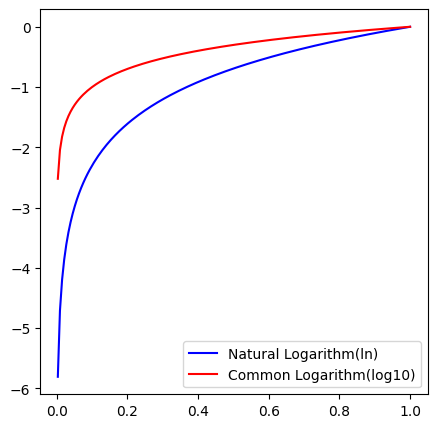

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# X값 생성
x = np.linspace(start=-5, stop=1.0, num=1000)

# 그래프 크기 지정
plt.figure(figsize=(5, 5))

# 자연로그(Natural Logarithm) Y값 생성
plt.plot(x, np.log(x), "b-", label="Natural Logarithm(ln)")

# 상용로그(Common Logarithm) Y값 생성
plt.plot(x, np.log10(x), "r-", label="Common Logarithm(log10)")

plt.legend()  # 범례출력

- $x$가 1일 때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아집니다.
- 이 식도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됩니다. 반대로 정답일 때의 출력이 작아질수록 오차는 커집니다.

#####

In [4]:
import numpy as np


def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
# 정답은 '2' (원-핫 인코딩)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# 예1: 정답 값이 0.6의 확률일 때
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

# 예2: 정답 값이 0.1의 확률일 때
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

> 교차 엔트로피 오차 수식 (미니배치)
$$
E = -\frac{1}{N} \sum_n \sum_k t_{nk}\log y_{nk}
$$


- 데이터가 $N$개일 때, $t_{nk}$는 $n$번째 데이터의 $k$번째 값
- $y_{nk}$는 정답 레이블
- 데이터 하나에 대한 손실함수를 단순히 $N$개의 데이터로 확장했을 뿐. 다만, 마지막에 $N$으로 나누어 정규화 → 평균 손실 함수
  - 평균을 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있습니다.

> 미니배치, 미니배치 학습
- 훈련 데이터의 수가 많을 때, 모든 데이터를 대상으로 손실 함수의 합을 구하는 것은 매우 오랜 시간이 걸립니다.
- 데이터 일부를 추려 전체의 '근사치'로 이용. 이 일부를 '미니배치'라고 합니다.
- 예) 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아 그 100장만을 사용하여 학습하는 것 → 미니배치 학습

In [6]:
# import sys, os

# sys.path.append(os.pardir)
# import numpy as np
# from dataset.mnist import load_mnist

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# print(x_train.shape)
# print(t_train.shape)

### 4.2.5 왜 손실 함수를 설정하는가?

## 4.3 수치 미분

$$
 \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \rightarrow \frac{f(x+h) - f(x-h)}{2h}
 $$


- 수치 해석 분야에서의 점 $x$에 대한 미분
  - 미분은 한 점에서의 기울기이나, '$h$는 0에 한없이 가깝다'라는 것을 표현(컴퓨터로 구현)할 수 없으니 위 식은 $x$와 $x+h$ 사이의 기울기가 되므로 식을 수정해야 합니다.
  - 우리의 목표는 $W$에 대한 손실함수 값의 변화량을 구하는 것이므로, 위의 $x$는 $W$입니다.

- 편미분
  - 입력과 출력 관계에서 입력의 변수가 2개 이상일 때, 각 입력 변수에 대한 출력 변화량
  - 주로 입력은 가중치 $ W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ \end{bmatrix}$ (가중치)이고, 출력은 손실함수의 값입니다.
  - 이 때, 편미분은 $w_{11}, w_{12}$ 등의 가중치 원소가 아주 미소한 값 $h$만큼 변할 때 손실함수 값의 변화량을 의미합니다.

- 기울기(Gradient)란?
  - 모든 입력($W$의 각 가중치 원소)에 대한 출력(손실함수의 값) 변화량
  - 즉 모든 입력에 대한 편미분을 벡터화한 것

### 4.3.1 미분

$$
 \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

- 좌변은 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호
- $x$의 '작은 변화'가 함수 $f(x)$을 얼마나 변화시키는가

In [7]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - (x)) / h

- 개선이 필요한 점
  - (1) 반올림 오차 문제를 해결해야 한다.
    - 반올림 오차는 작은 값(예: 소수점 8자리 이하)이 생략되어 최종 계산에 오차가 발생합니다.
      - 1e-50을 float32형으로 나타내면 0.0이 되어, 올바로 표현할 수 없습니다.
  - (2) 수치 미분에는 오차가 포함되므로 이 오차를 줄여야 한다.
    - '전정한 미분'은 $x$ 위치의 함수의 기울기(접선)에 해당하지만, 수치 미분은 $(x+h)$와 $s$ 사이의 기울기에 해당하므로, 값은 엄밀히 일치하지 않습니다.
    - 이 차이는 $h$를 무한히 0으로 좁히는 것이 불가능하기 때문에 생기는 한계입니다.
    - → 중심 차분(= 중앙 차분) 이용
      - $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산
      - *전방 차분: $(x+h)$와 $x$의 차분
      - *차분: 임의의 두 점에서의 함수 값들의 차이

In [8]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)

### 4.3.2 수치 미분의 예

문제 1: $y = 0.01x^2 + 0.1x$ 일 때, $x=5$일 때와 $x=10$의 미분은?

In [9]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

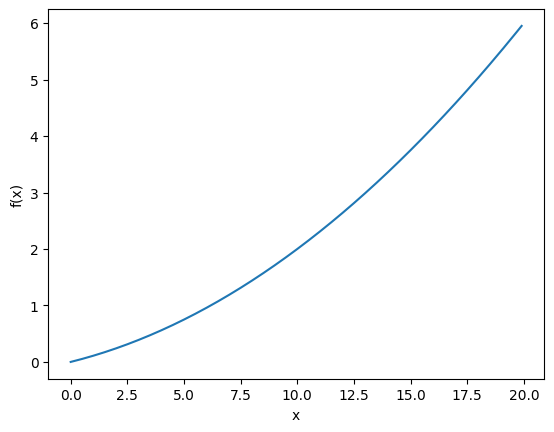

In [10]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [11]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


- $f(x)=0.01x^2 + 0.1$의 해석적 해(수식을 전개하여 미분하는 것)는 $\frac{df(x)}{d}=0.02x + 0.1$ 
- 진정한 미분은 0.2와 0.3 → 수치 미분의 결과와 비교해 보았을 때, 거의 같습니다.

### 4.3.3 편미분

$$
f(x_0, x_1) = x_{0}^2 + x_{1} ^ 2
$$

In [12]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2
    # 또는 return np.sum(x**2)

문제 1: $x_0=3, x_1=4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x}$를 구하라.

In [13]:
def function2_tmp1(x0):
    return x0**x0 + 4.0**2.0


print(numerical_diff(function2_tmp1, 3.0))

56.66253229954066


문제 2: $x_0=3, x_1=4$일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial y}$를 구하라.

In [14]:
def function2_tmp2(x1):
    return 3.0**2.0 + x1**x1


print(numerical_diff(function2_tmp2, 4.0))

610.8913629813628


## 4.4 기울기(Gradient)

- $x_0=3, x_1=4$일 때, $(x_0, x_1)$ 양쪽의 편미분을 묶어서 $\left(\frac{\partial f}{\partial x_0},\, \frac{\partial f}{\partial x_1}\right)$을 계산한다고 할 때,
- $\left(\frac{\partial f}{\partial x_0},\, \frac{\partial f}{\partial x_1}\right)$처럼 모든 변수의 편미분을 벡터로 정리한 것을 기울기(Gradient)라고 합니다.

In [15]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad

In [16]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


- 변수 f는 손실함수의 값을 구하는 함수, 변수 x는 $m \times n$ 형태의 가중치
- 변수 grad는 x와 같은 형태의 0으로 채워진 배열
- 가중치의 원소의 개수만큼 반복문 수행
- 가중치의 첫번째 원소에 h를 더함(가중치에 h만큼 변화를 줌). 이 때, 변화된 가중치에 대한 손실함수 값을 변수 fxh1에 저장함.
- 가중치의 첫번째 원소에 h를 뺌(가중치에 h만큼 변화를 줌). 이 때, 변화된 가중치에 대한 손실함수 값을 변수 fxh2에 저장함.
- 가중치의 첫번째 원소에 대한 기울기를 변수 grad의 첫번째 원소에 저장함.
- 이에 따라, $W$에 대한($W$의 가중치 원소에 대한) 손실함수 값의 변화량을 반환함. 

##### [그림 4-9] $f(x_0, x_1)=x_0^2+x_1^2$의 기울기

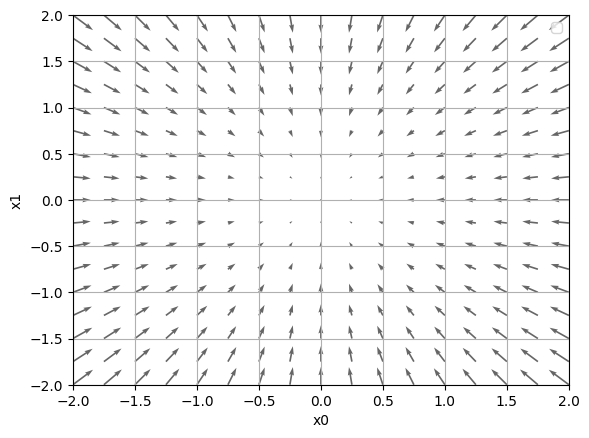

### 4.4.1 경사법(경사 하강법)

- 신경망은 최적의 매개변수(가중치와 편향)를 학습 시에 찾습니다.
- 현 위치(매개변수)에서 기울어진 방향으로 일정 거리만큼 이동한 후, 이동한 곳에서도 다시 기울기를 구하고, 또 그 기울어진 방향으로 나가가기를 반복하여 함수(비용 함수)의 값을 점차 줄이는 것

$$
x_0 = x_0 - \eta\frac{\partial f}{\partial x_0} \\
x_1 = x_1 - \eta\frac{\partial f}{\partial x_1}
$$

- $\eta$ 기호(에타)는 갱신하는 양. 학습률.
  - 한 번의 학습으로 얼만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하는가 정하는 것

In [27]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

문제: 경사법으로 $f(x_0, x_1)=x_0^2+x_1^2$의 최솟값을 구하라.

In [28]:
def function_2(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [30]:
# 학습률이 너무 큰 예: lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 예: lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


- 학습률이 너무 크면 큰 값으로 발산합니다.
- 학습률이 너무 작으면 거의 갱신되지 않습니다.

### 4.4.2 신경망에서의 기울기

- 기울기: 가중치 매개변수에 대한 손실 함수의 기울기
- 예) 가중치 $W$ (형상 $2\times3$), 손실 함수 $L$

$$
\mathbf{W}=\begin{pmatrix} 
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23}
\end{pmatrix} 
$$

$$
\frac{\partial L}{\partial \mathbf{W}}=\begin{pmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{23}}
\end{pmatrix} 
$$

- $\frac{\partial L}{\partial \mathbf{W}}$의 각 원소는 각각의 원소에 대한 편미분
  - 예) 1행 1번째 원소인 $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하는가를 나타냅니다.

In [31]:
import sys, os

sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

ModuleNotFoundError: No module named 'common'